# Titanic dataset analysis

<b> Variable -->	Definition </b>

survival -->	Survival (0 = No, 1 = Yes)

pclass -->	    Ticket class (A proxy for socio-economic status)  -- (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)

sex	-->        Gender	

Age	   -->     Age in years	

sibsp	 -->   # of siblings / spouses aboard the Titanic	

parch	-->    # of parents / children aboard the Titanic	

fare -->	    Passenger fare	

embarked --> Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [27]:
%matplotlib inline

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

In [29]:
train = pd.read_csv('titanic.csv')

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Data Visualization

In [ ]:
sns.countplot(x='Survived',data=train)

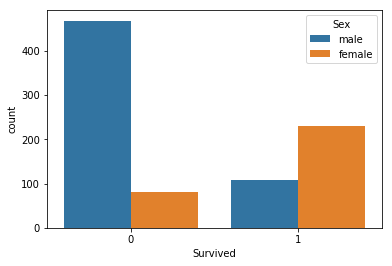

In [12]:
sns.countplot(x='Survived',hue='Sex',data=train)

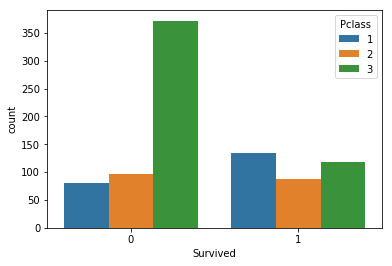

In [13]:
sns.countplot(x='Survived', hue='Pclass', data=train)

/home/vyshnav/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


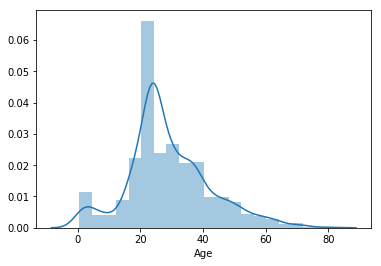

In [14]:
sns.distplot(train['Age'] ,bins=20)

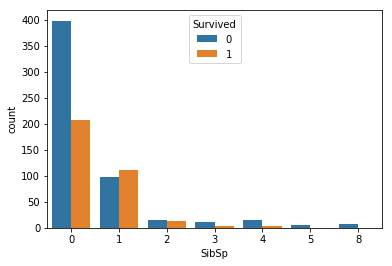

In [15]:
sns.countplot(x='SibSp',hue = 'Survived', data=train)

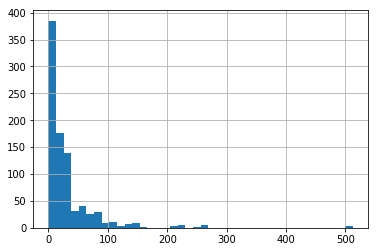

In [16]:
train['Fare'].hist(bins=40)

### Encoding Categorical Variables

In [17]:
sex = pd.get_dummies(train['Sex'], drop_first=True)   # drop_first removes the first of the k categories
embark = pd.get_dummies(train['Embarked'], drop_first=True)

train.drop(['Sex','Embarked'], axis=1, inplace=True)   # inplace argument replaces the same dataset.

train = pd.concat([train, sex, embark], axis=1)

### Splitting the data

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.3 KB


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']],
                                                    train['Survived'], 
                                                    test_size=0.20, 
                                                    random_state=101)

### Model Training and Predicting

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

/home/vyshnav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.7134831460674157

#### Not so bad, but it can be improved by adding more data and if the accuracy does not improve a lot, we can use different algorithms.

In [22]:
confusion_matrix(y_test, y_pred)

array([[85, 20],
       [31, 42]])

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf = rf.fit(X_train,y_train)

In [24]:
y_pred = rf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.7640449438202247

In [26]:
confusion_matrix(y_test, y_pred)

array([[88, 17],
       [25, 48]])